# Meteorological Data Analysis to determine the effect of the sea on weather

In [1]:
import pandas as pd

#acquring the collected weather data of Aurangabad into a pandas dataframe

Aurangabad = pd.read_json('Auranga.json')

In [2]:
Aurangabad.head()

,base,clouds,cod,coord,dt,id,main,name,rain,sys,timezone,visibility,weather,wind
0,stations,{'all': 100},200,"{'lon': 75.33, 'lat': 19.87}",1562793488,1278149,"{'temp': 297.559, 'pressure': 1003.76, 'humidi...",Aurangabad,{'3h': 4},"{'message': 0.0115, 'country': 'IN', 'sunrise'...",19800,NaN,"[{'id': 501, 'main': 'Rain', 'description': 'm...","{'speed': 5.86, 'deg': 265.661}"
1,stations,{'all': 75},200,"{'lon': 75.33, 'lat': 19.87}",1562797088,1278149,"{'temp': 296.15, 'pressure': 1005, 'humidity':...",Aurangabad,NaN,"{'type': 1, 'id': 9057, 'message': 0.006900000...",19800,5000.0,"[{'id': 721, 'main': 'Haze', 'description': 'h...","{'speed': 3.1, 'deg': 250}"
2,stations,{'all': 100},200,"{'lon': 75.33, 'lat': 19.87}",1562800689,1278149,"{'temp': 297.368, 'pressure': 1003.47, 'humidi...",Aurangabad,{'3h': 1},"{'message': 0.008, 'country': 'IN', 'sunrise':...",19800,NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...","{'speed': 6.58, 'deg': 266.2}"
3,stations,{'all': 100},200,"{'lon': 75.33, 'lat': 19.87}",1562804289,1278149,"{'temp': 297.468, 'pressure': 1003.19, 'humidi...",Aurangabad,{'3h': 3.25},"{'message': 0.0067, 'country': 'IN', 'sunrise'...",19800,NaN,"[{'id': 501, 'main': 'Rain', 'description': 'm...","{'speed': 4.59, 'deg': 257.517}"
4,stations,{'all': 75},200,"{'lon': 75.33, 'lat': 19.87}",1562807889,1278149,"{'temp': 296.15, 'pressure': 1006, 'humidity':...",Aurangabad,NaN,"{'type': 1, 'id': 9057, 'message': 0.0076, 'co...",19800,5000.0,"[{'id': 721, 'main': 'Haze', 'description': 'h...","{'speed': 1.5, 'deg': 250}"


In [25]:
Aurangabad['name'][0]

'Aurangabad'

In [2]:
import datetime

#'prepare' is a method to extract the required information from the collected dataset

def prepare(city, dist):
    temp = []
    humidity = []
    pressure = []
    description = []
    dt = []
    wind_speed = []
    wind_deg = []
    day = []
    distance = []
    name = []
    for i in range(city.shape[0]):
        temp.append(city['main'][i]['temp']-273.15)
        humidity.append(city['main'][i]['humidity'])
        pressure.append(city['main'][i]['pressure'])
        description.append(city['weather'][i][0]['description'])
        dt.append(city['dt'][i])
        wind_speed.append(city['wind'][i]['speed'])
        wind_deg.append(city['wind'][i]['deg'])
        day.append(datetime.datetime.fromtimestamp(city['dt'][i]))
        distance.append(dist)
        name.append(city['name'][i])
    headings = ['temp','humidity','pressure','description','dt','wind_deg','wind_speed','day','distance']
    data = [temp, humidity, pressure, description, dt, wind_deg, wind_speed, day, distance]
    df = pd.DataFrame(data, index = headings)
    city = df.T
    return city

    

In [3]:
#usable dataframe is formed from the json file for Aurangabad

aurangabad_df = prepare(Aurangabad, 261)

In [4]:
#observing aurangabad_df

aurangabad_df.head()

,temp,humidity,pressure,description,dt,wind_deg,wind_speed,day,distance
0,24.409,84,1003.76,moderate rain,1562793488,265.661,5.86,2019-07-11 02:48:08,261
1,23,94,1005,haze,1562797088,250,3.1,2019-07-11 03:48:08,261
2,24.218,83,1003.47,light rain,1562800689,266.2,6.58,2019-07-11 04:48:09,261
3,24.318,85,1003.19,moderate rain,1562804289,257.517,4.59,2019-07-11 05:48:09,261
4,23,94,1006,haze,1562807889,250,1.5,2019-07-11 06:48:09,261


In [5]:
#process is repeated for rest of the cities

Mumbai = pd.read_json('Mumbai.json')
mumbai_df = prepare(Mumbai, 0)
mumbai_df.head()

,temp,humidity,pressure,description,dt,wind_deg,wind_speed,day,distance
0,28,94,1003,light rain,1562793118,240,6.2,2019-07-11 02:41:58,0
1,29,89,1002,light rain,1562796880,240,6.2,2019-07-11 03:44:40,0
2,29,89,1002,light rain,1562800561,240,6.7,2019-07-11 04:46:01,0
3,29,83,1003,light rain,1562803738,240,6.2,2019-07-11 05:38:58,0
4,28,88,1003,light rain,1562807889,240,7.2,2019-07-11 06:48:09,0


In [6]:
Pune = pd.read_json('Pune.json')
pune_df = prepare(Pune, 120)
pune_df.head()

,temp,humidity,pressure,description,dt,wind_deg,wind_speed,day,distance
0,21.808,95,1005.13,moderate rain,1562793488,245.429,4.79,2019-07-11 02:48:08,120
1,21.808,95,1005.13,moderate rain,1562797088,245.429,4.79,2019-07-11 03:48:08,120
2,21.818,94,1005.05,moderate rain,1562800530,248.032,5.1,2019-07-11 04:45:30,120
3,21.918,95,1004.89,moderate rain,1562804289,249.243,4.1,2019-07-11 05:48:09,120
4,21.918,95,1004.89,moderate rain,1562807889,249.243,4.1,2019-07-11 06:48:09,120


In [7]:
Vasai_virar = pd.read_json('Vasai-Virar.json')
vasai_virar_df = prepare(Vasai_virar, 51)
vasai_virar_df.head()

,temp,humidity,pressure,description,dt,wind_deg,wind_speed,day,distance
0,28,94,1003,light rain,1562793488,240,6.2,2019-07-11 02:48:08,51
1,29,89,1002,light rain,1562797088,240,6.2,2019-07-11 03:48:08,51
2,29,89,1002,light rain,1562800689,240,6.7,2019-07-11 04:48:09,51
3,29,83,1003,light rain,1562804289,240,6.2,2019-07-11 05:48:09,51
4,28,88,1003,light rain,1562807889,240,7.2,2019-07-11 06:48:09,51


In [8]:
Nashik = pd.read_json('Nashik.json')
nashik_df = prepare(Nashik, 154)
nashik_df.head()

,temp,humidity,pressure,description,dt,wind_deg,wind_speed,day,distance
0,22.708,93,1003.69,light rain,1562793488,235.557,6.78,2019-07-11 02:48:08,154
1,22.708,93,1003.69,light rain,1562797088,235.557,6.78,2019-07-11 03:48:08,154
2,22.518,95,1003.52,light rain,1562800689,242.062,6.29,2019-07-11 04:48:09,154
3,22.418,95,1003.19,light rain,1562804289,231.824,4.7,2019-07-11 05:48:09,154
4,22.418,95,1003.19,light rain,1562807889,231.824,4.7,2019-07-11 06:48:09,154


In [9]:
Solapur = pd.read_json('Solapur.json')
solapur_df = prepare(Solapur, 182)
solapur_df.head()

,temp,humidity,pressure,description,dt,wind_deg,wind_speed,day,distance
0,24.509,80,1006.77,overcast clouds,1562793488,241.514,7.03,2019-07-11 02:48:08,182
1,24.509,80,1006.77,overcast clouds,1562797088,241.514,7.03,2019-07-11 03:48:08,182
2,24.218,81,1006.73,overcast clouds,1562800689,253.569,6.03,2019-07-11 04:48:09,182
3,24.218,81,1006.74,overcast clouds,1562804289,243.645,6.94,2019-07-11 05:48:09,182
4,24.218,81,1006.74,overcast clouds,1562807649,243.645,6.94,2019-07-11 06:44:09,182


In [10]:
Kolhapur = pd.read_json('Kolhapur.json')
kolhapur_df = prepare(Kolhapur, 291)
kolhapur_df.head()

,temp,humidity,pressure,description,dt,wind_deg,wind_speed,day,distance
0,21.909,90,1006.89,light rain,1562793488,252.334,6.83,2019-07-11 02:48:08,291
1,21.909,90,1006.89,light rain,1562797088,252.334,6.83,2019-07-11 03:48:08,291
2,21.718,91,1006.85,light rain,1562800689,255.878,6.34,2019-07-11 04:48:09,291
3,21.918,90,1006.81,light rain,1562804289,254.118,6,2019-07-11 05:48:09,291
4,21.918,90,1006.81,light rain,1562807889,254.118,6,2019-07-11 06:48:09,291


In [11]:
Ichalkaranji = pd.read_json('Ichalkaranji.json')
ichalkaranji_df = prepare(Ichalkaranji, 304)
ichalkaranji_df.head()

,temp,humidity,pressure,description,dt,wind_deg,wind_speed,day,distance
0,21.909,90,1006.89,light rain,1562793488,252.334,6.83,2019-07-11 02:48:08,304
1,21.909,90,1006.89,light rain,1562797088,252.334,6.83,2019-07-11 03:48:08,304
2,21.718,91,1006.85,light rain,1562800689,255.878,6.34,2019-07-11 04:48:09,304
3,21.918,90,1006.81,light rain,1562804289,254.118,6,2019-07-11 05:48:09,304
4,21.918,90,1006.81,light rain,1562807889,254.118,6,2019-07-11 06:48:09,304


In [12]:
Jalgaon = pd.read_json('Jalgaon.json')
jalgaon_df = prepare(Jalgaon, 365)
jalgaon_df.head()

,temp,humidity,pressure,description,dt,wind_deg,wind_speed,day,distance
0,26.909,76,1003.25,overcast clouds,1562793437,255.17,5.13,2019-07-11 02:47:17,365
1,26.909,76,1003.25,overcast clouds,1562797088,255.17,5.13,2019-07-11 03:48:08,365
2,26.118,81,1003.07,light rain,1562800689,259.778,3.36,2019-07-11 04:48:09,365
3,26.318,80,1002.72,overcast clouds,1562804289,241.039,3.99,2019-07-11 05:48:09,365
4,26.318,80,1002.72,overcast clouds,1562807889,241.039,3.99,2019-07-11 06:48:09,365


In [13]:
Latur = pd.read_json('Latur.json')
latur_df = prepare(Latur, 399)
latur_df.head()

,temp,humidity,pressure,description,dt,wind_deg,wind_speed,day,distance
0,23.909,82,1004.8,light rain,1562793488,247.095,5.28,2019-07-11 02:48:08,399
1,23.909,82,1004.8,light rain,1562797088,247.095,5.28,2019-07-11 03:48:08,399
2,23.518,81,1004.73,light rain,1562800689,249.163,6.29,2019-07-11 04:48:09,399
3,23.418,83,1004.63,overcast clouds,1562804289,246.662,5.46,2019-07-11 05:48:09,399
4,23.418,83,1004.63,overcast clouds,1562807889,246.662,5.46,2019-07-11 06:48:09,399


In [14]:
#size of the dataset

print(mumbai_df.shape)

(94, 9)


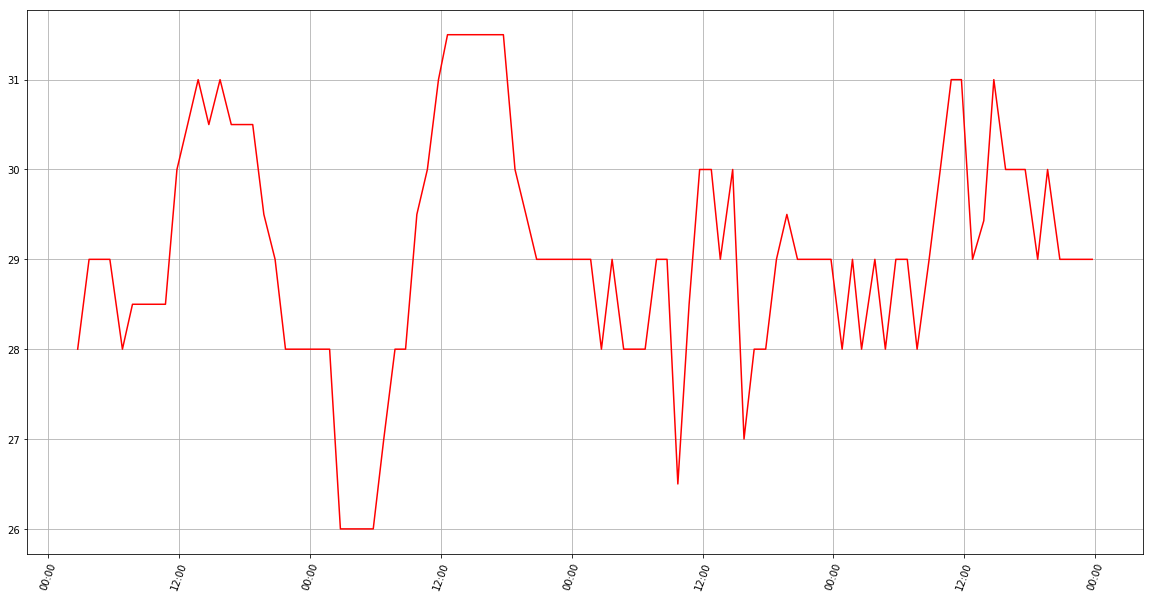

In [83]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#visualize the variation in temperature of Mumbai during the time of observation

y1 = mumbai_df['temp']
x1 = mumbai_df['day']
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation = 70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.grid()
ax.plot(x1, y1, 'r')

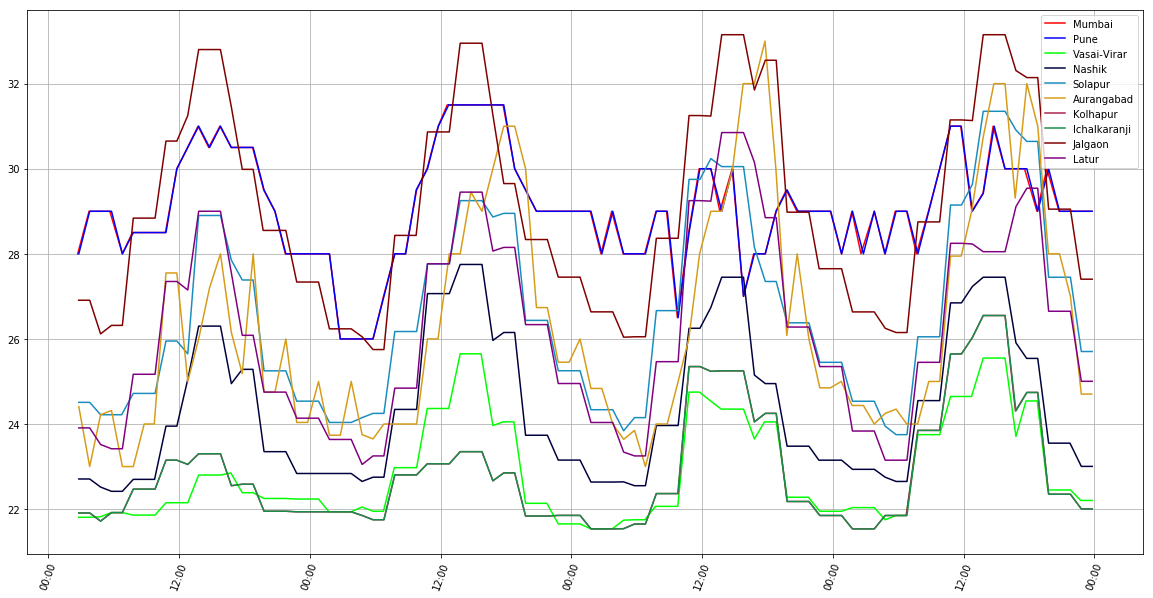

In [82]:
#observe the variation in all the cities



y1 = mumbai_df['temp']
x1 = mumbai_df['day']
y2 = vasai_virar_df['temp']
x2 = vasai_virar_df['day']
y3 = pune_df['temp']
x3 = pune_df['day']
y4 = nashik_df['temp']
x4 = nashik_df['day']
y5 = solapur_df['temp']
x5 = solapur_df['day']
y6 = aurangabad_df['temp']
x6 = aurangabad_df['day']
y7 = kolhapur_df['temp']
x7 = kolhapur_df['day']
y8 = ichalkaranji_df['temp']
x8 = ichalkaranji_df['day']
y9 = jalgaon_df['temp']
x9 = jalgaon_df['day']
y10 = latur_df['temp']
x10 = latur_df['day']
fig,ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation = 70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.grid()
plt.plot(x1,y1,'#FF0000',label='Mumbai')
plt.plot(x2,y2,'#0000FF',label = 'Pune')
plt.plot(x3,y3,'#00FF00',label = 'Vasai-Virar')
plt.plot(x4,y4,'#00003D',label = 'Nashik')
plt.plot(x5,y5,'#198DBF',label='Solapur')
plt.plot(x6,y6,'#D69C19',label = 'Aurangabad')
plt.plot(x7,y7,'#AE214A',label = 'Kolhapur')
plt.plot(x8,y8,'#198D4A',label='Ichalkaranji')
plt.plot(x9,y9,'#800000',label='Jalgaon')
plt.plot(x10,y10,'#800080',label = 'Latur')
plt.legend(loc = 'upper right')

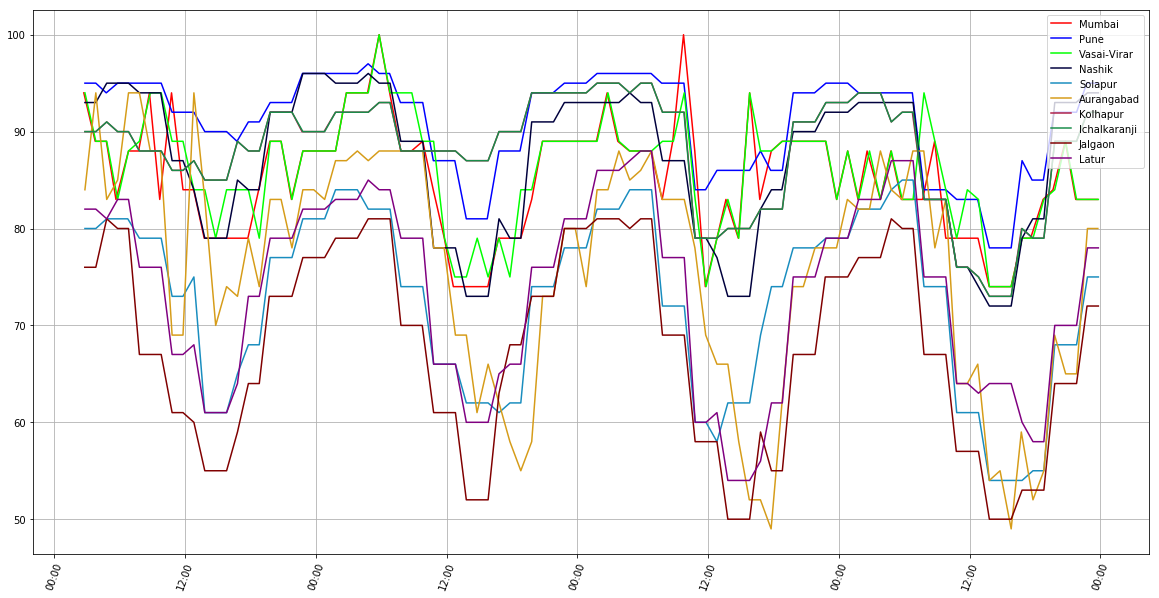

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#visualise the variation in humidity in all the cities

y1 = mumbai_df['humidity']
x1 = pd.to_datetime(mumbai_df['day'])
y2 = pune_df['humidity']
x2 = pd.to_datetime(pune_df['day'])
y3 = vasai_virar_df['humidity']
x3 = pd.to_datetime(vasai_virar_df['day'])
y4 = nashik_df['humidity']
x4 = pd.to_datetime(nashik_df['day'])
y5 = solapur_df['humidity']
x5 = pd.to_datetime(solapur_df['day'])
y6 = aurangabad_df['humidity']
x6 = pd.to_datetime(aurangabad_df['day'])
y7 = kolhapur_df['humidity']
x7 = pd.to_datetime(kolhapur_df['day'])
y8 = ichalkaranji_df['humidity']
x8 = pd.to_datetime(ichalkaranji_df['day'])
y9 = jalgaon_df['humidity']
x9 = pd.to_datetime(jalgaon_df['day'])
y10 = latur_df['humidity']
x10 = pd.to_datetime(latur_df['day'])
fig, ax = plt.subplots(figsize = (20,10))
plt.xticks(rotation = 70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.grid()
plt.plot(x1,y1,'#FF0000',label='Mumbai')
plt.plot(x2,y2,'#0000FF',label = 'Pune')
plt.plot(x3,y3,'#00FF00',label = 'Vasai-Virar')
plt.plot(x4,y4,'#00003D',label = 'Nashik')
plt.plot(x5,y5,'#198DBF',label='Solapur')
plt.plot(x6,y6,'#D69C19',label = 'Aurangabad')
plt.plot(x7,y7,'#AE214A',label = 'Kolhapur')
plt.plot(x8,y8,'#198D4A',label='Ichalkaranji')
plt.plot(x9,y9,'#800000',label='Jalgaon')
plt.plot(x10,y10,'#800080',label = 'Latur')
plt.legend(loc = 'upper right')

In [17]:
distances = [mumbai_df['distance'][0],pune_df['distance'][0],vasai_virar_df['distance'][0],nashik_df['distance'][0],solapur_df['distance'][0],aurangabad_df['distance'][0],kolhapur_df['distance'][0],ichalkaranji_df['distance'][0],jalgaon_df['distance'][0],latur_df['distance'][0]]

In [16]:
temp_max = [mumbai_df['temp'].max(),pune_df['temp'].max(),vasai_virar_df['temp'].max(),nashik_df['temp'].max(),solapur_df['temp'].max(),aurangabad_df['temp'].max(),kolhapur_df['temp'].max(),ichalkaranji_df['temp'].max(),jalgaon_df['temp'].max(),latur_df['temp'].max()]

In [21]:
temp_min = [mumbai_df['temp'].min(),pune_df['temp'].min(),vasai_virar_df['temp'].min(),nashik_df['temp'].min(),solapur_df['temp'].min(),aurangabad_df['temp'].min(),kolhapur_df['temp'].min(),ichalkaranji_df['temp'].min(),jalgaon_df['temp'].min(),latur_df['temp'].min()]

In [22]:
distances

[0, 120, 51, 154, 182, 261, 291, 304, 365, 399]

In [90]:
temp_max

[31.5,
 25.650000000000034,
 31.5,
 27.75,
 31.350000000000023,
 33.0,
 26.55000000000001,
 26.55000000000001,
 33.150000000000034,
 30.850000000000023]

In [91]:
temp_min

[26.0,
 21.536,
 26.0,
 22.418000000000006,
 23.75,
 23.0,
 21.535000000000025,
 21.535000000000025,
 25.75,
 23.05000000000001]

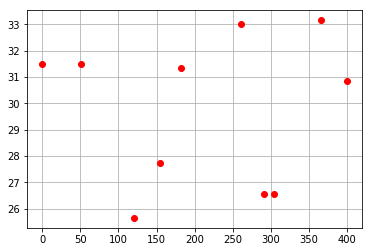

In [92]:
plt.grid()

#maximum temperature of each city vs distance from sea
plt.plot(distances, temp_max, 'ro')

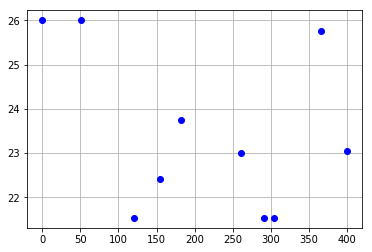

In [93]:
plt.grid()

#minimum temperature in each city vs ditance from sea
plt.plot(distances, temp_min, 'bo')

In [27]:
mean_temp = [mumbai_df.mean()['temp'], vasai_virar_df.mean()['temp'], pune_df.mean()['temp'], nashik_df.mean()['temp'], solapur_df.mean()['temp'], aurangabad_df.mean()['temp'], kolhapur_df.mean()['temp'], ichalkaranji_df.mean()['temp'], jalgaon_df.mean()['temp'], latur_df.mean()['temp']]
mean_temp

[29.08436170212766,
 29.084255319148937,
 22.877170212765975,
 24.37624468085109,
 26.62470212765958,
 26.36836170212767,
 22.872989361702142,
 22.872989361702142,
 29.14210638297875,
 26.16467021276598]

In [107]:
mean_humidity = [mumbai_df.mean()['humidity'], vasai_virar_df.mean()['humidity'], pune_df.mean()['humidity'], nashik_df.mean()['humidity'], solapur_df.mean()['humidity'], aurangabad_df.mean()['humidity'], kolhapur_df.mean()['humidity'], ichalkaranji_df.mean()['humidity'], jalgaon_df.mean()['humidity'], latur_df.mean()['humidity']]
mean_humidity

[85.1063829787234,
 85.94680851063829,
 91.02127659574468,
 86.95744680851064,
 72.5,
 75.81914893617021,
 88.06382978723404,
 88.06382978723404,
 67.7127659574468,
 73.3936170212766]

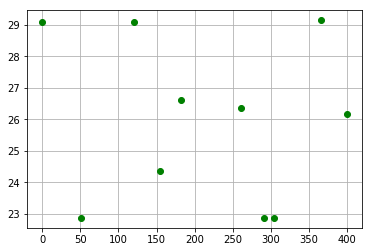

In [109]:
plt.grid()

#average temperature of each city vs distance from the sea
plt.plot(distances, mean_temp, 'go')

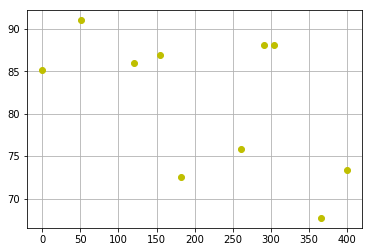

In [110]:
plt.grid()

#average humidity of each city vs distance from the sea
plt.plot(distances, mean_humidity, 'yo')

## Visualize the trend in the change of temperature with varying distance from the sea

The temperatures of the cities within 130 kilometres from the sea is predicted to observe the trend and then the trend of the cities after 100 kilometres from the sea is observed.

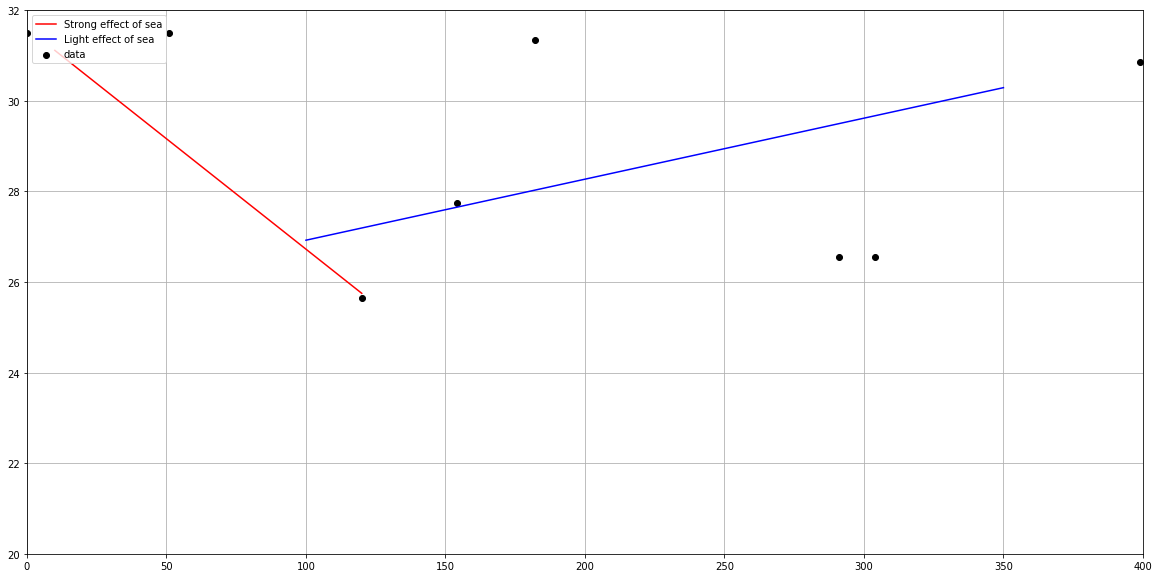

In [26]:
%matplotlib inline
import numpy as np


x = np.array(distances)
y = np.array(temp_max)
x1 = x[x<130]
x1 = x1.reshape((x1.size, 1))

#temperatures of the cities within 130 kilometres from the sea is placed into a separate array
y1 = y[x<130]
x2 = x[x>100]
x2 = x2.reshape((x2.size, 1))

#temparatures of the cities situated 100 kilometres or beyond from the sea is put into another array
y2 = y[x>100]
from sklearn.svm import SVR
svr_lin1 = SVR(kernel = 'linear', C = 1e2)
svr_lin2 = SVR(kernel = 'linear', C=1e2)

#support_vector_regression is used to predcit the trend in the change of temperature
svr_lin1.fit(x1,y1)
svr_lin2.fit(x2,y2)
xp1 = np.arange(10, 130, 10).reshape((12,1))
xp2 = np.arange(100, 400, 50).reshape((6,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)
fig, ax = plt.subplots(figsize = (20,10))
plt.grid()
plt.plot(xp1, yp1, 'r',label='Strong effect of sea')
plt.plot(xp2,yp2,'b', label = 'Light effect of sea')
plt.axis((0, 400, 20, 32))
plt.scatter(x, y, c='k', label = 'data')
plt.legend(loc = 'upper left')

The trends can be seen to be expressed by two straight-lines. Let's see the co-effcients and interception of both of the lines

In [19]:
print(svr_lin1.coef_)
print(svr_lin1.intercept_)
print(svr_lin2.coef_)
print(svr_lin2.intercept_)

[[-0.04875]]
[31.6]
[[0.01346939]]
[25.57571429]


A straight-line signifies a linear equation. The point of intersection of two straight lines denotes the solution of two linear equation. By finding the point of intersection of the two straight-lines, we can figure out after which distance the effect of the sea on the weather vanishes.

[x, y] = [96, 26]


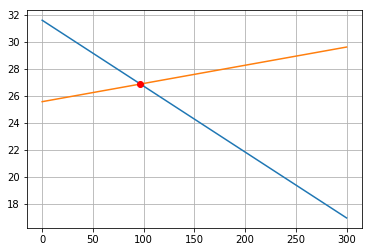

In [20]:
from scipy.optimize import fsolve

def line1(x):
    m1 = svr_lin1.coef_[0][0]
    c1 = svr_lin1.intercept_[0]
    return m1*x+c1

def line2(x):
    m2 = svr_lin2.coef_[0][0]
    c2 = svr_lin2.intercept_[0]
    return m2*x+c2

def findIntersection(fun1, fun2, x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

result = findIntersection(line1, line2, 0.0)
print("[x, y] = [%d, %d]"%(result, line1(result)))
x = np.linspace(0,300,31)
plt.grid()
plt.plot(x, line1(x),x,line2(x),result,line1(result),'ro')

We can perform similar operation using the minimum temperatures

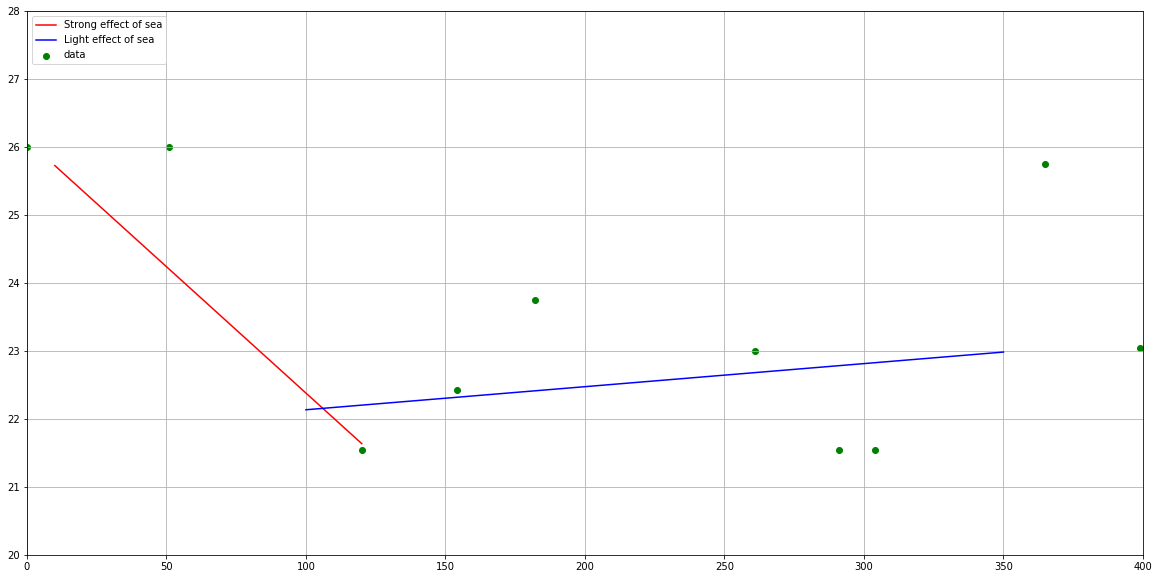

In [24]:
x = np.array(distances)
y = np.array(temp_min)
x1 = x[x<130]
x1 = x1.reshape((x1.size, 1))
y1 = y[x<130]
x2 = x[x>100]
x2 = x2.reshape((x2.size, 1))
y2 = y[x>100]
from sklearn.svm import SVR
svr_lin1 = SVR(kernel = 'linear', C = 1e2)
svr_lin2 = SVR(kernel = 'linear', C=1e2)
svr_lin1.fit(x1,y1)
svr_lin2.fit(x2,y2)
xp1 = np.arange(10, 130, 10).reshape((12,1))
xp2 = np.arange(100, 400, 50).reshape((6,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)
fig, ax = plt.subplots(figsize = (20,10))
plt.grid()
plt.plot(xp1, yp1, 'r',label='Strong effect of sea')
plt.plot(xp2,yp2,'b', label = 'Light effect of sea')
plt.axis((0, 400, 20, 28))
plt.scatter(x, y, c='g', label = 'data')
plt.legend(loc = 'upper left')
plt.title = 'Minimum Temperature'

[x, y] = [106, 22]


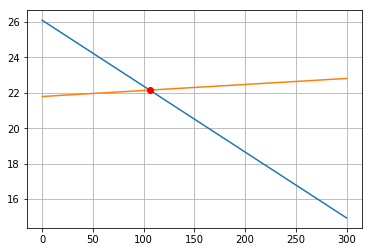

In [25]:
def line1(x):
    m1 = svr_lin1.coef_[0][0]
    c1 = svr_lin1.intercept_[0]
    return m1*x+c1

def line2(x):
    m2 = svr_lin2.coef_[0][0]
    c2 = svr_lin2.intercept_[0]
    return m2*x+c2

def findIntersection(fun1, fun2, x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

result = findIntersection(line1, line2, 0.0)
print("[x, y] = [%d, %d]"%(result, line1(result)))
x = np.linspace(0,300,31)
plt.grid()
plt.plot(x, line1(x),x,line2(x),result,line1(result),'ro')

In [32]:
humidity_max = [mumbai_df['humidity'].max(),pune_df['humidity'].max(),vasai_virar_df['humidity'].max(),nashik_df['humidity'].max(),solapur_df['humidity'].max(),aurangabad_df['humidity'].max(),kolhapur_df['humidity'].max(),ichalkaranji_df['humidity'].max(),jalgaon_df['humidity'].max(),latur_df['humidity'].max()]

In [29]:
humidity_min = [mumbai_df['humidity'].min(),pune_df['humidity'].min(),vasai_virar_df['humidity'].min(),nashik_df['humidity'].min(),solapur_df['humidity'].min(),aurangabad_df['humidity'].min(),kolhapur_df['humidity'].min(),ichalkaranji_df['humidity'].min(),jalgaon_df['humidity'].min(),latur_df['humidity'].min()]

In [134]:
humidity_min

[74, 78, 74, 72, 54, 49, 73, 73, 50, 54]

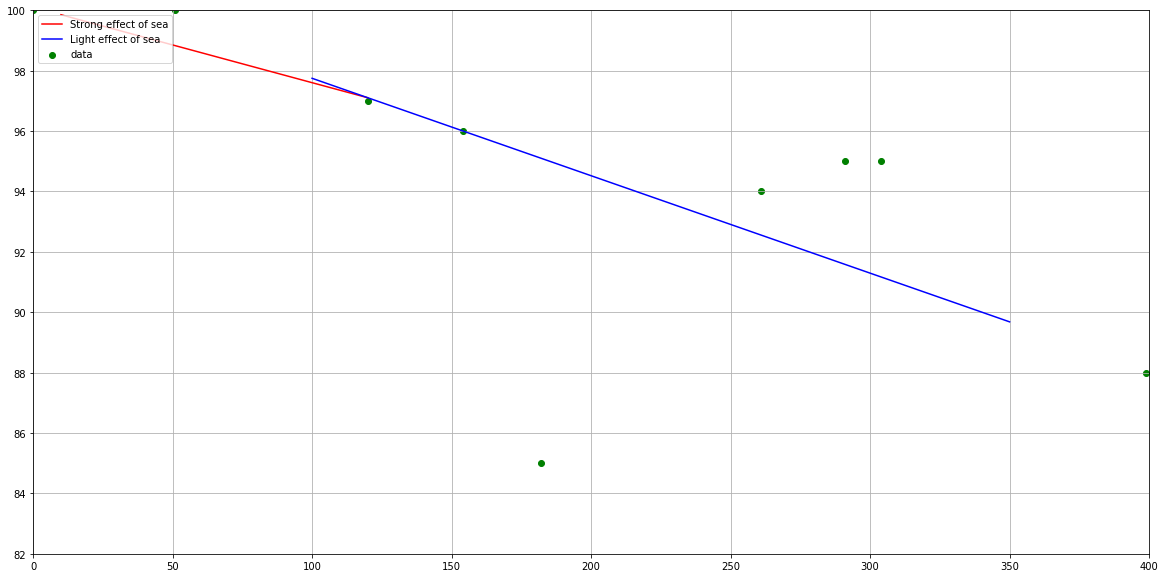

In [33]:
#let us visualise the trend in the change of maximum humidity

x = np.array(distances)
y = np.array(humidity_max)
x1 = x[x<130]
x1 = x1.reshape((x1.size, 1))
y1 = y[x<130]
x2 = x[x>100]
x2 = x2.reshape((x2.size, 1))
y2 = y[x>100]
from sklearn.svm import SVR
svr_lin1 = SVR(kernel = 'linear', C = 1e2)
svr_lin2 = SVR(kernel = 'linear', C=1e2)
svr_lin1.fit(x1,y1)
svr_lin2.fit(x2,y2)
xp1 = np.arange(10, 130, 10).reshape((12,1))
xp2 = np.arange(100, 400, 50).reshape((6,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)
fig, ax = plt.subplots(figsize = (20,10))
plt.grid()
plt.plot(xp1, yp1, 'r',label='Strong effect of sea')
plt.plot(xp2,yp2,'b', label = 'Light effect of sea')
plt.axis((0, 400, 82, 100))
plt.scatter(x, y, c='g', label = 'data')
plt.legend(loc = 'upper left')

Maximum humidity seems to decrease uniformly as moved away from the sea. We can perform the same operatrion on the minimum humidity

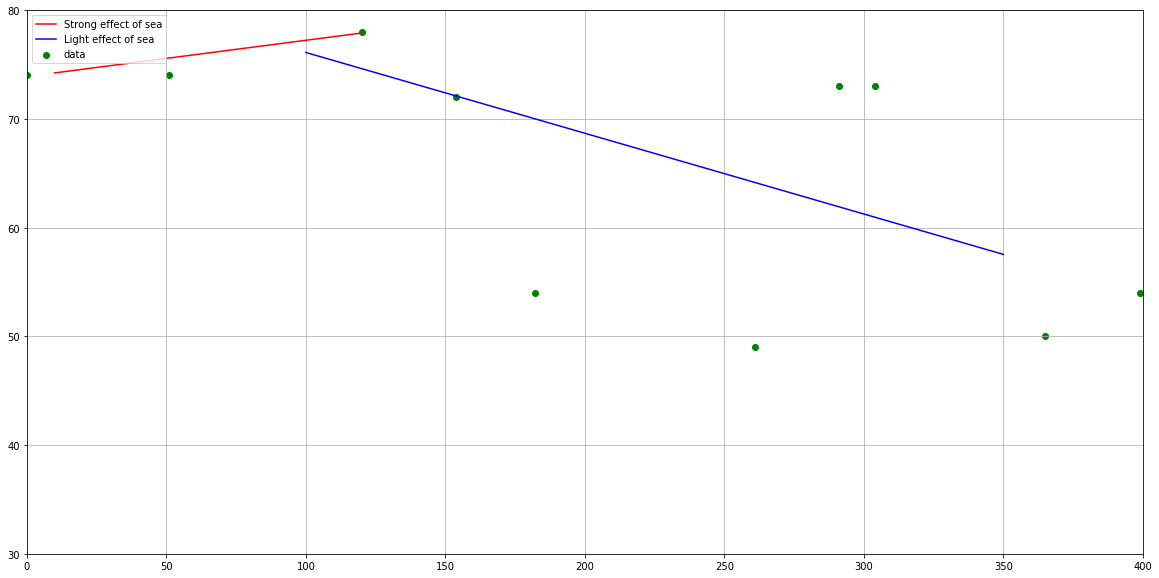

In [35]:
x = np.array(distances)
y = np.array(humidity_min)
x1 = x[x<130]
x1 = x1.reshape((x1.size, 1))
y1 = y[x<130]
x2 = x[x>100]
x2 = x2.reshape((x2.size, 1))
y2 = y[x>100]
from sklearn.svm import SVR
svr_lin1 = SVR(kernel = 'linear', C = 1e2)
svr_lin2 = SVR(kernel = 'linear', C=1e2)
svr_lin1.fit(x1,y1)
svr_lin2.fit(x2,y2)
xp1 = np.arange(10, 130, 10).reshape((12,1))
xp2 = np.arange(100, 400, 50).reshape((6,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)
fig, ax = plt.subplots(figsize = (20,10))
plt.grid()
plt.plot(xp1, yp1, 'r',label='Strong effect of sea')
plt.plot(xp2,yp2,'b', label = 'Light effect of sea')
plt.axis((0, 400, 30, 80))
plt.scatter(x, y, c='g', label = 'data')
plt.legend(loc = 'upper left')

[x, y] = [89, 76]


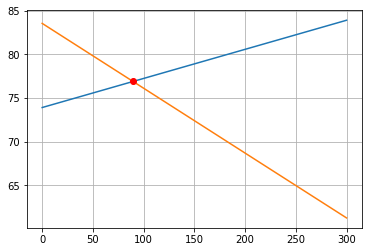

In [36]:
#now let us find out the distance after which the trend in the change in minimum temperature varies.

def line1(x):
    m1 = svr_lin1.coef_[0][0]
    c1 = svr_lin1.intercept_[0]
    return m1*x+c1

def line2(x):
    m2 = svr_lin2.coef_[0][0]
    c2 = svr_lin2.intercept_[0]
    return m2*x+c2

def findIntersection(fun1, fun2, x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

result = findIntersection(line1, line2, 0.0)
print("[x, y] = [%d, %d]"%(result, line1(result)))
x = np.linspace(0,300,31)
plt.grid()
plt.plot(x, line1(x),x,line2(x),result,line1(result),'ro')